In [1]:
# options for viewing Jupyter notebook itself

%matplotlib inline
%config InlineBackend.figure_format = "retina"
from IPython.display import display
import importlib
import sys
import plotly.offline as py
py.init_notebook_mode(connected=True)

## determine proper "band_width" and "deviation" (and maybe "min_density")

In [2]:
import pandas as pd
from src.dacmaster.peak import PeaksFinder

In [4]:
pf = PeaksFinder("develop/dmel_middle/reads.fasta", "develop/dmel_middle/datruf_units")

[I 190202 13:00:26 peak:265] 7024 out of 500000 all reads and 200286 out of 497457 all units were loaded


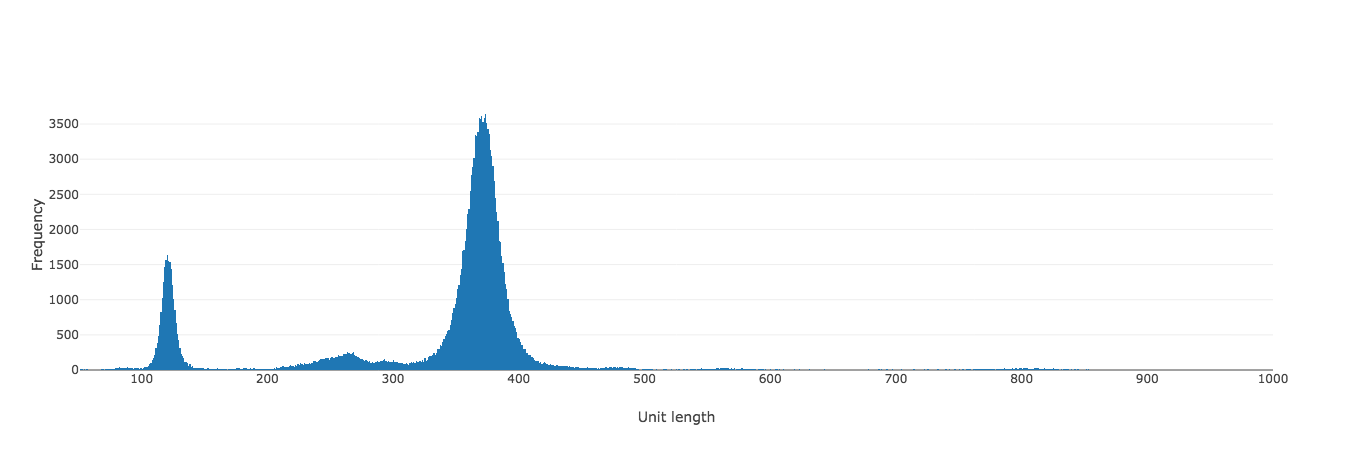

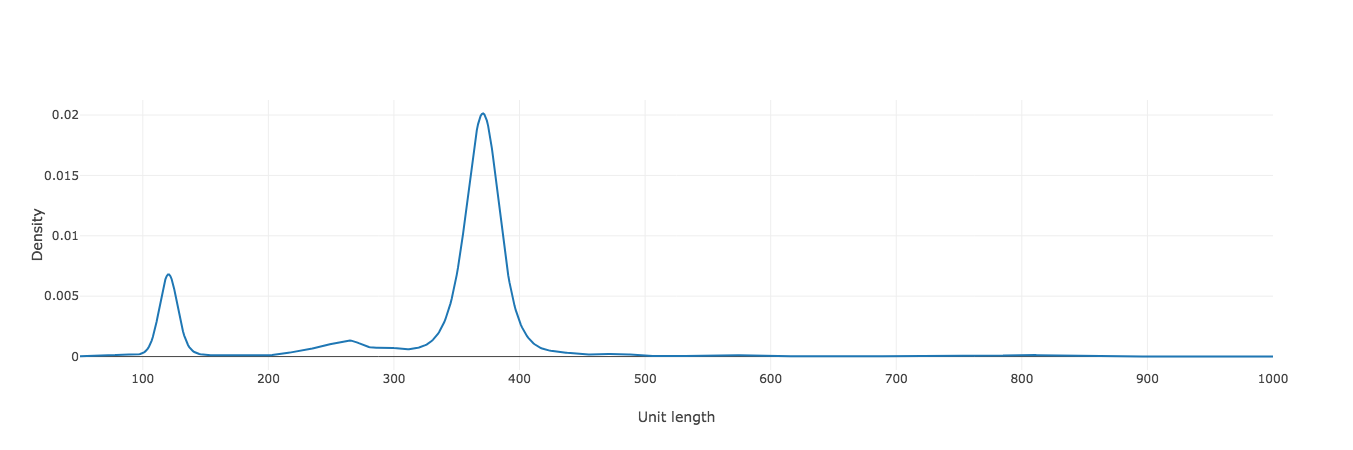

In [5]:
pf.plot_dist()

## ~240bpのユニットは短いTRとしてしか存在しない

In [9]:
from BITS.seq import load_fasta

In [10]:
reads = load_fasta("develop/dmel_middle/reads.fasta")
reads = {i + 1: [header, len(seq), seq]
              for i, (header, seq) in enumerate(reads.items())}
reads = pd.DataFrame.from_dict(reads,
                                    orient="index",
                                    columns=("header",
                                             "length",
                                             "sequence"))
reads.index.names = ["dbid"]
units = pd.read_csv("develop/dmel_middle/datruf_units", sep='\t', index_col=0)

In [14]:
data = pd.DataFrame({"unit_sum": units.groupby("read_id")["length"].sum(),
                     "unit_mean": units.groupby("read_id")["length"].mean(),
                     "read_len": units.groupby("read_id").apply(lambda df: reads.loc[df.name]["length"])})

In [15]:
data["percent"] = data.apply(lambda df: df["unit_sum"] / df["read_len"], axis=1)

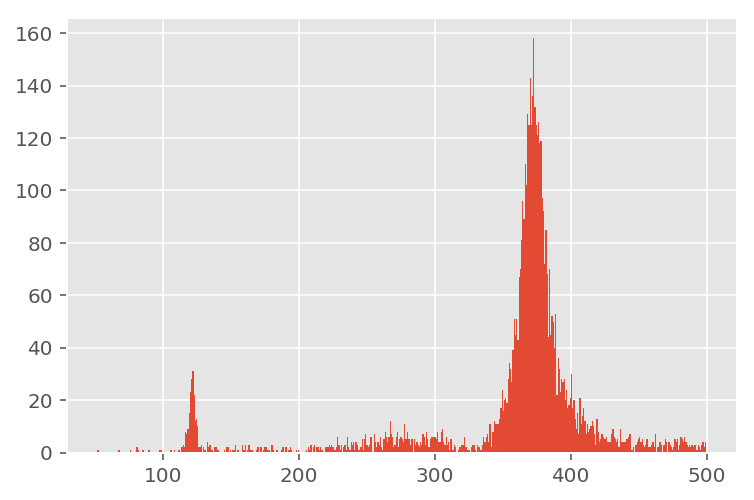

In [16]:
data[data["percent"] >= 0.8]["unit_mean"].pipe(lambda s: s[s > 50]).pipe(lambda s: s[s < 500]).hist(bins=500)

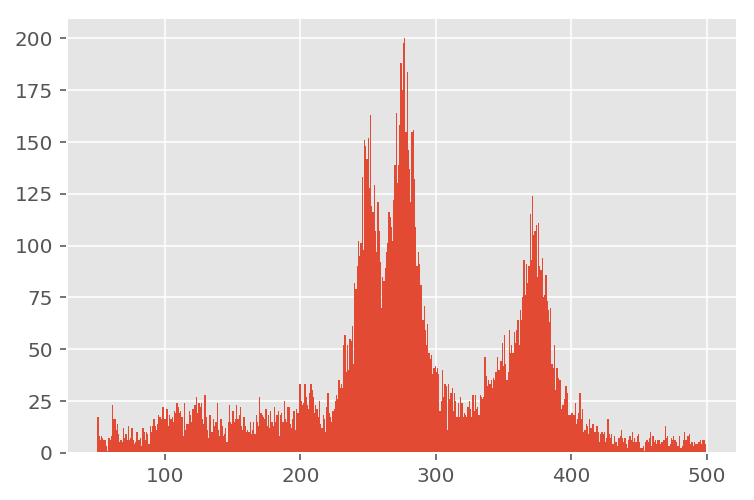

In [17]:
data[data["percent"] < 0.8]["unit_mean"].pipe(lambda s: s[s > 50]).pipe(lambda s: s[s < 500]).hist(bins=500)